## 5 Data sets

There is a lot of Documentation on this subject. Here we will breifly introduce Series and Dataframes to help research with DataBases

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 5.1 - Series

"Series" is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print s

In [ ]:
s['a']

In [ ]:
s[0]

In [ ]:
s['c']*3.0

In [ ]:
np.exp(s)

In [ ]:
s.plot()

In [ ]:
pl1 = pd.Series(np.array([25, 1, 12, 4]), index=['Liga', 'Cup', 'Europe', 'Other'], name='Ronaldo')
print pl1

In [ ]:
np.sum(pl1)

In [ ]:
pl2 = pd.Series(np.array([37, 5, 11, 1]), index=['Liga', 'Cup', 'Europe', 'Other'], name="Messi")
print pl2

In [ ]:
np.sum(pl2)

In [ ]:
pl1 + pl2

In [ ]:
pl1['Liga'] + pl2['Liga']

In [ ]:
print "Total goals scored:", np.sum(pl1 + pl2)
print "Total goals scored:", np.sum(pl1) + np.sum(pl2)

In [ ]:
pl1.mean()

In [ ]:
pl1.plot()
pl2.plot()
plt.legend()

## 5.2 - Dataframes

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

In [ ]:
import webbrowser
url = 'https://en.wikipedia.org/wiki/2016%E2%80%9317_Primeira_Liga#Attendances'
webbrowser.open(url)

In [ ]:
#df = pd.read_csv('Files/Attendances.csv')#, thousands=',')
##Get a single sheet
df = pd.ExcelFile('Files/Attendances.xlsx').parse('Final')
#Or read_json (not in this class)
#Or read from clipboard (additional packaged needed)
#df = pd.read_clipboard()
df

In [ ]:
df.head(3)

In [ ]:
df.tail(2)

In [ ]:
df

In [ ]:
df.loc[4]

In [ ]:
df = pd.read_csv('Files/Attendances.csv', index_col='Pos')

In [ ]:
df.head(3)

In [ ]:
df.loc[1]

In [ ]:
df[['Team','Average']]

In [ ]:
#How many people during a Match Day went to a game
df['Average'].sum()/2

You need to be careful and make sure your database is conviniently formatted. Here, the Portuguese convention for the thousands separator, a comma, ruined our chances of having floats or ints. No math is possible, so we must replace it in the database.

In [ ]:
#Fields we want to change
df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

In [ ]:
#df2

In [ ]:
#df2.mean()

In [ ]:
#To replace with a similar dataframe as the original
# ndf = df does not work, as if you change ndf you will change df as well
ndf = df.copy(deep=True)
#ndf[['Total','High','Low','Average']] = df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

In [ ]:
ndf.head()

In [ ]:
ndf.drop(['Change'], axis=1, inplace=True)

In [ ]:
ndf.head()

In [ ]:
ndf[ndf['Total']>100000]

In [ ]:
ndf.sort_values('High', ascending=False)

print the line where condition is met

In [ ]:
ndf.loc[ndf['Low'].idxmin()]

In [ ]:
ndf.loc[ndf['Low'].idxmax()]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#Make it nicer
matplotlib.style.use('ggplot')

In [ ]:
#ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar')
fnt_size=16
ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar', figsize=(15,5), fontsize=fnt_size)
ax.set_xlabel('Teams', fontsize=fnt_size)
ax.set_ylabel('Attendance', fontsize=fnt_size)
plt.show()

## 5.3 - Extra: Seaborn as a visualization and statistical analysis platform for pandas

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [1]:
%matplotlib inline
import pandas as pd
from pandas_datareader import DataReader #Install it from the anaconda navigator
from datetime import datetime
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Real-life example: Read the stock price evolution from yahoo finance.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
# Set up End and Start times for data grab (last year)
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
# General Info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-08-31 to 2017-08-31
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


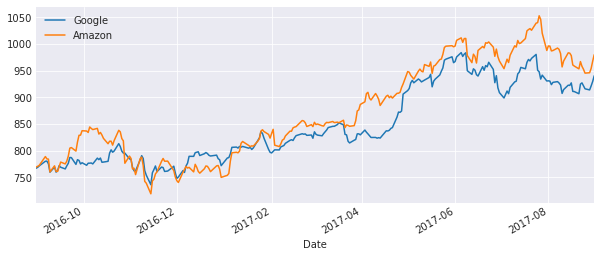

In [5]:
# Let's see a historical view of the closing price
GOOG['Adj Close'].plot(legend=True,figsize=(10,4), label='Google')
AMZN['Adj Close'].plot(legend=True,figsize=(10,4), label='Amazon')

In [6]:
#This is just a showcase example, it is beyond the scope of this class
import seaborn as sns

In [7]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df = closing_df.sort_index()

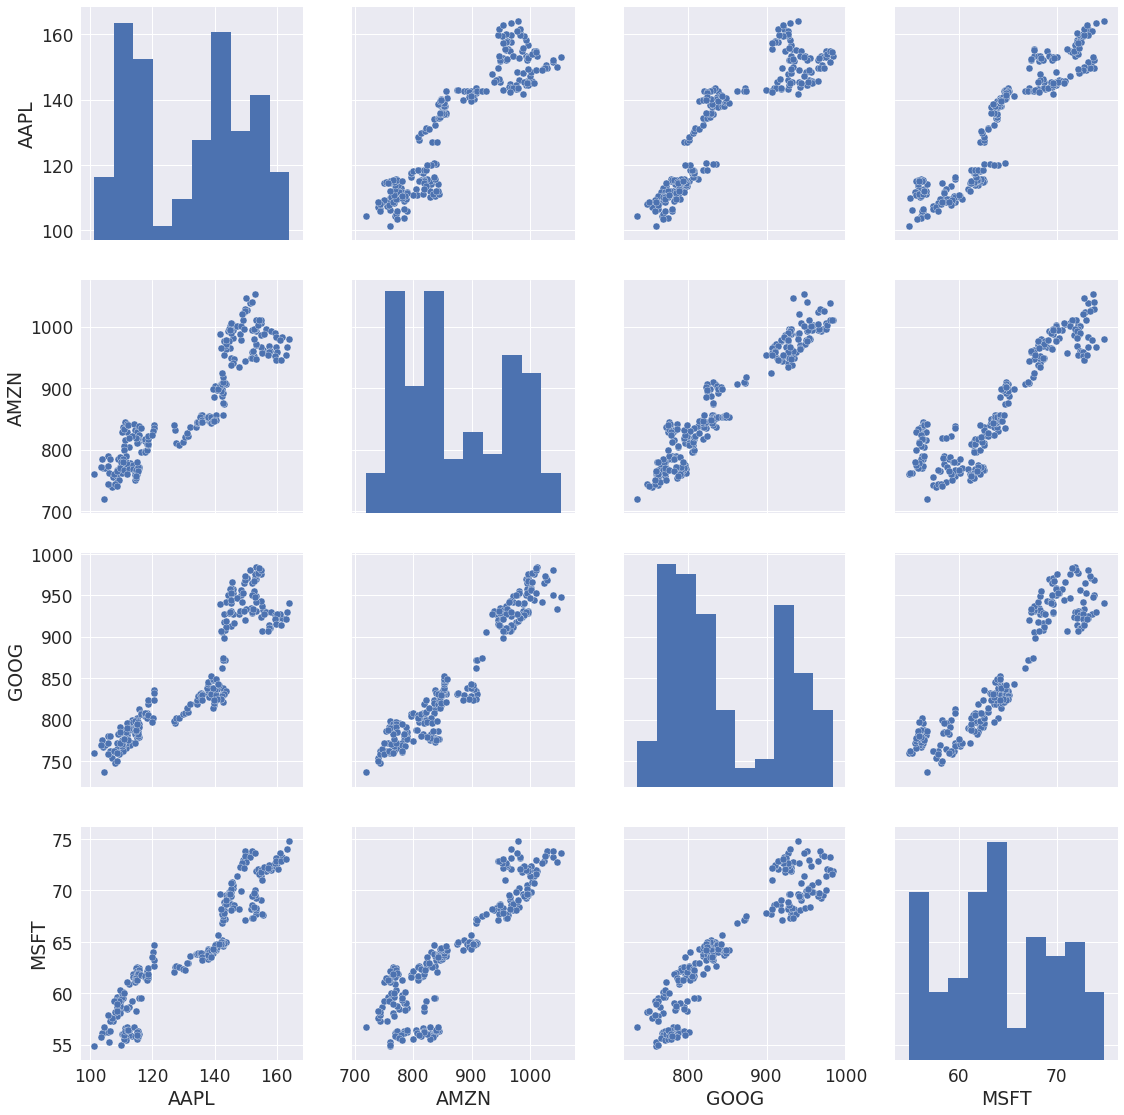

In [11]:
sns.set(font_scale=1.7)
#Simple line that gives us the oevrview of each Stock evolution
sns.pairplot(closing_df.dropna(),size=4)

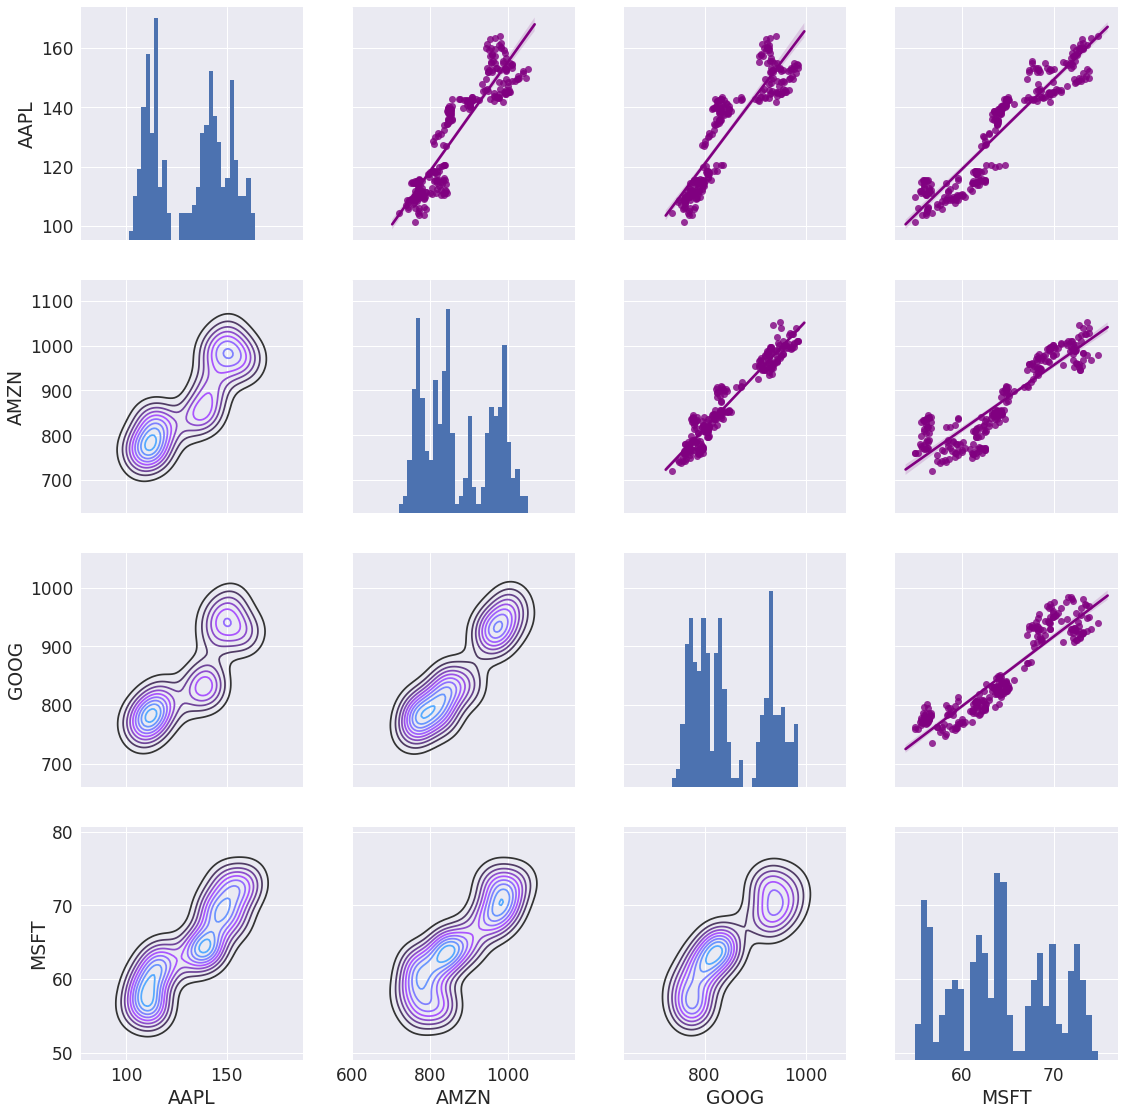

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna(),size=4)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

### 5.4 - Extra 2: Pivottables js

In [6]:
#Install it from our anaconda navigator or "conda install pivvottablejs"
from pivottablejs import pivot_ui
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
df = pd.read_csv(url, sep = '\s+',names = ['MPG','Cylinders','Displacement','Horse power','Weight','Acceleration','Model Year','Origin','Car Name'])
df.head() 

,MPG,Cylinders,Displacement,Horse power,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
pivot_ui(df)